# NIFTY 50 Risk and Strategy Analysis

This project analyzes daily NIFTY 50 price data to understand return behavior,
risk dynamics, and the performance of a simple rule-based trading strategy.
The focus is on volatility, drawdowns, and risk-adjusted performance rather than return prediction.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf


## 1. Data and Return Construction



In [51]:
df = pd.read_csv('/Users/tusharbhatt/Desktop/Nifty/nifty 2.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

KeyError: 'date'

In [52]:
df_nifty = df[['Date','Price']]
df_nifty['Date'] =  pd.to_datetime(df_nifty['Date'])
df_nifty['date'] = df_nifty['Date']
df_nifty['close'] = df_nifty['Price']
df_nifty.drop(columns='Date',inplace=True)
df_nifty.drop(columns='Price',inplace=True)

/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_65849/958251303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nifty['Date'] =  pd.to_datetime(df_nifty['Date'])
/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_65849/958251303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nifty['date'] = df_nifty['Date']
/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_65849/958251303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [53]:
df_nifty = df_nifty.sort_values(by='date', ascending=True)
df_nifty.reset_index(drop=True, inplace=True)
df_nifty


,date,close
0,1995-11-06,988.92
1,1995-11-07,978.22
2,1995-11-08,964.01
3,1995-11-09,953.07
4,1995-11-10,948.82
...,...,...
4994,2015-11-18,7731.80
4995,2015-11-19,7842.75
4996,2015-11-20,7856.55
4997,2015-11-23,7849.25


## 1. Data and Return Construction


In [23]:
df_nifty['log_close'] = np.log(df_nifty['close'])
df_nifty['log_return'] = df_nifty['log_close'].diff()
mean_return = df_nifty['log_return'].mean()
std_return  = df_nifty['log_return'].std()

df_nifty

,date,close,log_close,log_return
0,1995-11-06,988.92,6.896613,NaN
1,1995-11-07,978.22,6.885735,-0.010879
2,1995-11-08,964.01,6.871102,-0.014633
3,1995-11-09,953.07,6.859688,-0.011413
4,1995-11-10,948.82,6.855219,-0.004469
...,...,...,...,...
4994,2015-11-18,7731.80,8.953097,-0.013585
4995,2015-11-19,7842.75,8.967345,0.014248
4996,2015-11-20,7856.55,8.969103,0.001758
4997,2015-11-23,7849.25,8.968173,-0.000930


#####  Return Behavior and Distribution


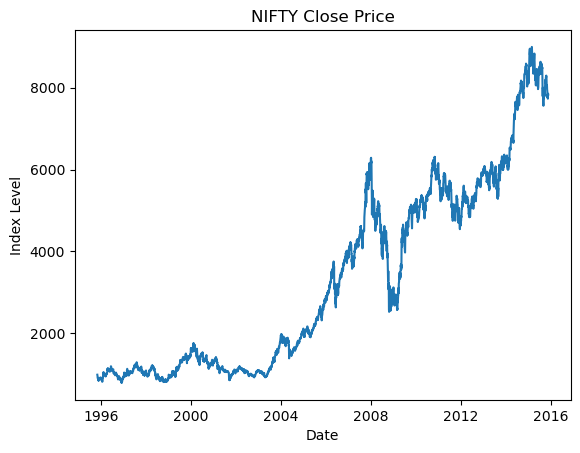

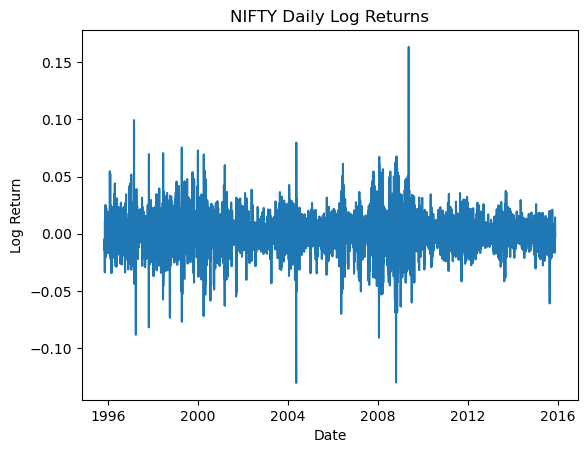

In [25]:
plt.figure()
plt.plot(df_nifty['date'], df_nifty['close'])
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.title("NIFTY Close Price")
plt.show()

plt.figure()
plt.plot(df_nifty['date'], df_nifty['log_return'])
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.title("NIFTY Daily Log Returns")
plt.show()


In [58]:

returns = df_nifty['log_return'].dropna()
mu = returns.mean()
sigma = returns.std()


KeyError: 'log_return'

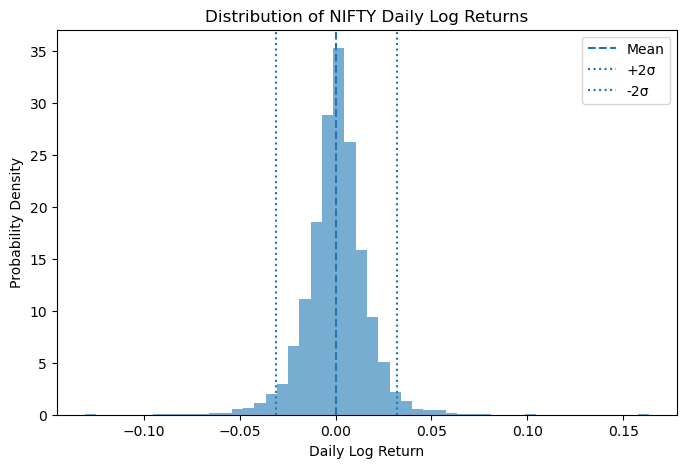

In [60]:

mean_ret = returns.mean()
std_ret = returns.std()

plt.figure(figsize=(8,5))
plt.hist(returns, bins=50, density=True, alpha=0.6)

plt.axvline(mean_ret, linestyle='--', label='Mean')
plt.axvline(mean_ret + 2*std_ret, linestyle=':', label='+2σ')
plt.axvline(mean_ret - 2*std_ret, linestyle=':', label='-2σ')

plt.xlabel("Daily Log Return")
plt.ylabel("Probability Density")
plt.title("Distribution of NIFTY Daily Log Returns")
plt.legend()
plt.show()


Most daily returns cluster close to zero, while extreme positive and negative
returns occur more frequently than a normal distribution would suggest.
This highlights the presence of fat tails and the importance of modeling risk
beyond average returns.


### Normal Distribution vs Empirical Returns


In [28]:

x = np.linspace(returns.min(), returns.max(), 500)
normal_curve = norm.pdf(x, mu, sigma)

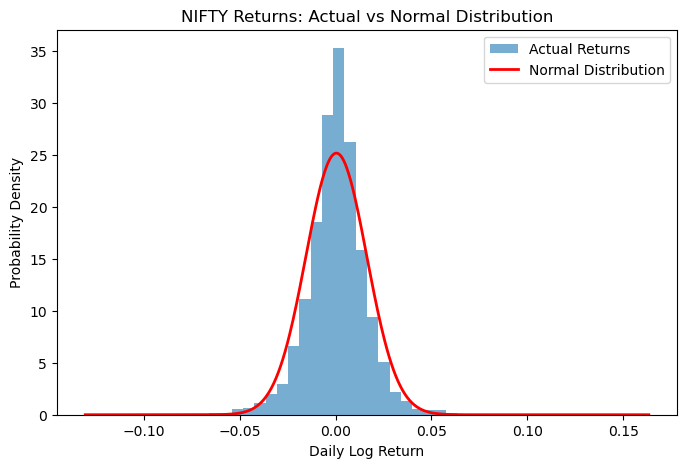

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.hist(returns, bins=50, density=True, alpha=0.6, label="Actual Returns")

# Normal curve
plt.plot(x, normal_curve, color="red", linewidth=2, label="Normal Distribution")

plt.xlabel("Daily Log Return")
plt.ylabel("Probability Density")
plt.title("NIFTY Returns: Actual vs Normal Distribution")
plt.legend()

plt.show()


# This means:
# The red normal curve predicts very few extreme returns
# The actual data shows many more extreme days

## 3. Volatility Clustering and Time-Varying Risk


In [30]:
rolling_vol = returns.rolling(window=20).std()

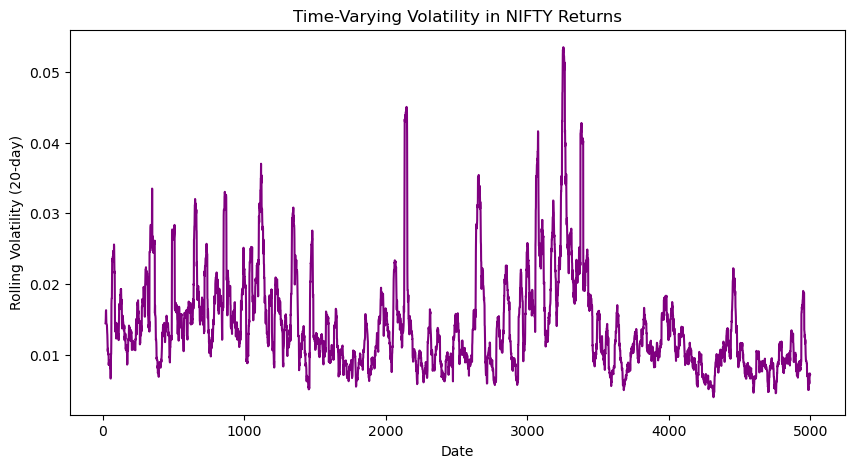

In [61]:


plt.figure(figsize=(10,5))
plt.plot(rolling_vol, color="purple")
plt.xlabel("Date")
plt.ylabel("Rolling Volatility (20-day)")
plt.title("Time-Varying Volatility in NIFTY Returns")
plt.show()


Volatility is not constant over time. Periods of high volatility tend to cluster
together, as do periods of low volatility. This indicates that market risk is
time-varying, making a single average risk measure misleading.


### Autocorrelation of Returns and Volatility


<Figure size 800x400 with 0 Axes>

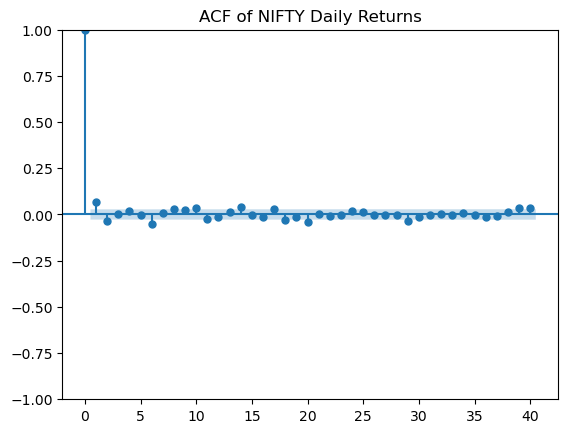

In [62]:
plt.figure(figsize=(8,4))
plot_acf(returns, lags=40)
plt.title("ACF of NIFTY Daily Returns")
plt.show()

<Figure size 800x400 with 0 Axes>

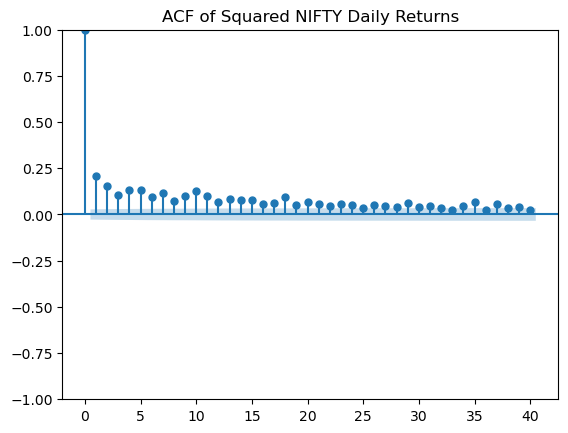

In [63]:
plt.figure(figsize=(8,4))
plot_acf(returns**2, lags=40)
plt.title("ACF of Squared NIFTY Daily Returns")
plt.show()


While raw returns show little autocorrelation, squared returns exhibit persistence, indicating that volatility has memory even when returns do not.

## 4. Simple Rule-Based Momentum Strategy


Rather than predicting returns, this strategy follows a simple time-series momentum rule.
If the cumulative return over the past 20 trading days is positive, the strategy takes
a long position in the market. Otherwise, it stays out. The goal is not to maximize returns
but to reduce exposure during unfavorable periods.


In [33]:
rolling_mean = returns.rolling(window=50).mean()
rolling_std  = returns.rolling(window=50).std()



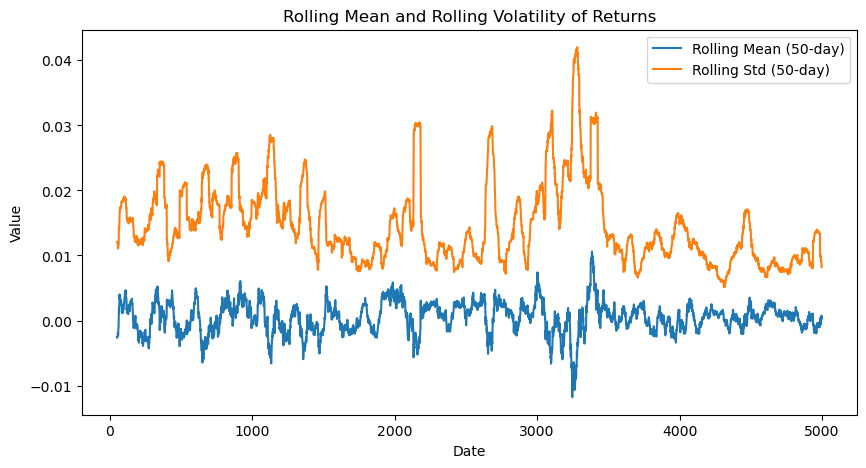

In [34]:
plt.figure(figsize=(10,5))

plt.plot(rolling_mean, label="Rolling Mean (50-day)")
plt.plot(rolling_std, label="Rolling Std (50-day)")

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Rolling Mean and Rolling Volatility of Returns")
plt.legend()

plt.show()


Strategy: Time-Series Momentum (Very Basic)

Intuition:

Assets that went up recently may continue to go up for a short time.




In [37]:
rolling_returns = returns.rolling(window = 20).sum()
rolling_returns = rolling_returns.dropna()
signal = rolling_returns > 0

signal
# True → market went up
# False → market didn’t


signal = signal.astype(int)

signal = signal.shift(1) #Use yesterday’s decision, not today’s future data
# signal


In [38]:
strategy_df = pd.DataFrame({
    "returns": returns,
    "rolling_return": rolling_returns,
    "signal": signal
})
strategy_df

,returns,rolling_return,signal
1,-0.010879,NaN,NaN
2,-0.014633,NaN,NaN
3,-0.011413,NaN,NaN
4,-0.004469,NaN,NaN
5,-0.033828,NaN,NaN
...,...,...,...
4994,-0.013585,-0.067903,0.0
4995,0.014248,-0.052035,0.0
4996,0.001758,-0.049072,0.0
4997,-0.000930,-0.055289,0.0


In [39]:
strategy_returns = signal * returns
buy_hold_cum = returns.cumsum()
strategy_cum = strategy_returns.cumsum()


In [40]:
strategy_cum = strategy_cum.dropna()

In [41]:
strategy_cum = strategy_cum.fillna(0)




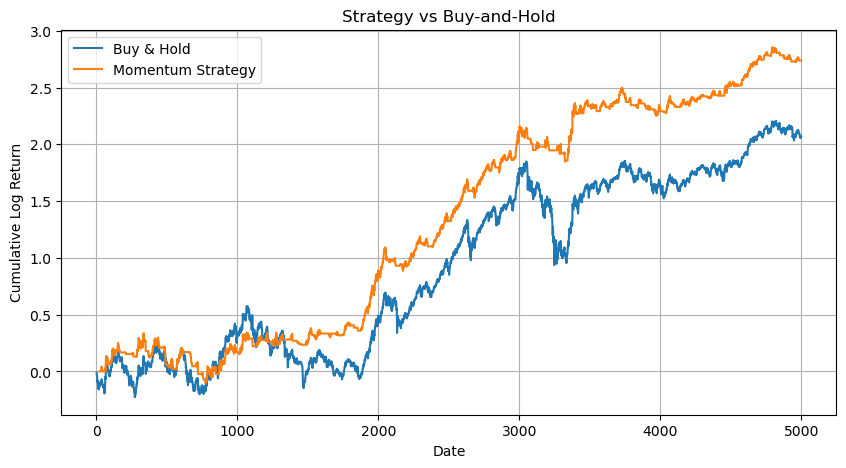

In [42]:
plt.figure(figsize=(10,5))
plt.plot(buy_hold_cum, label="Buy & Hold")
plt.plot(strategy_cum, label="Momentum Strategy")

plt.xlabel("Date")
plt.ylabel("Cumulative Log Return")
plt.title("Strategy vs Buy-and-Hold")
plt.legend()
plt.grid()
plt.show()


The strategy does not consistently outperform buy-and-hold in terms of total returns.
However, it alters the return path by reducing exposure during certain periods,
which motivates further evaluation using drawdowns and risk metrics.


## 5. Drawdowns, Risk Control, and Realistic Performance


In [64]:
buy_hold_wealth = np.exp(buy_hold_cum)
strategy_wealth = np.exp(strategy_cum) 
# This answers:
# What happened to my capital over time?

Text(0, 0.5, 'wealth starting form 1Rs')

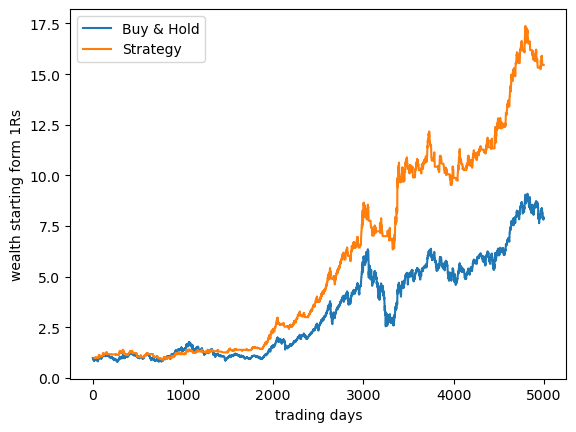

In [65]:
plt.plot(buy_hold_wealth, label="Buy & Hold")
plt.plot(strategy_wealth, label="Strategy")
plt.legend()    
plt.xlabel('trading days')
plt.ylabel('wealth starting form 1Rs')
#starting from 1 unit of capital

In [45]:
def drawdown(wealth):
    peak = wealth.cummax()
    dd = wealth/peak -1
    return dd
bh_dd = drawdown(buy_hold_wealth)
str_dd = drawdown(strategy_wealth)




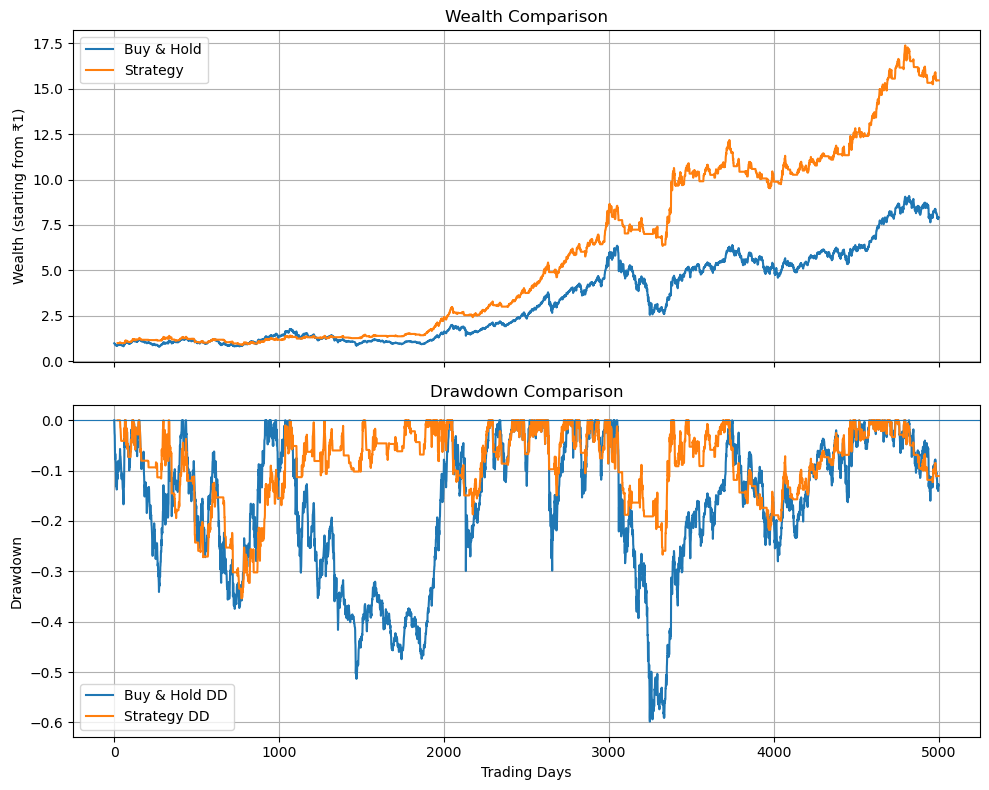

In [46]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

#Subplot 1: Wealth Curves
axes[0].plot(buy_hold_wealth, label="Buy & Hold")
axes[0].plot(strategy_wealth, label="Strategy")
axes[0].set_ylabel("Wealth (starting from ₹1)")
axes[0].set_title("Wealth Comparison")
axes[0].legend()
axes[0].grid(True)

#Subplot 2: Drawdowns
axes[1].plot(bh_dd, label="Buy & Hold DD")
axes[1].plot(str_dd, label="Strategy DD")
axes[1].axhline(0, linewidth=0.8)
axes[1].set_xlabel("Trading Days")
axes[1].set_ylabel("Drawdown")
axes[1].set_title("Drawdown Comparison")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


While the momentum strategy does not always deliver higher cumulative returns,
it experiences significantly smaller and shorter drawdowns compared to buy-and-hold.
This improves survivability and makes the strategy more practical from a risk management
perspective.


### Impact of Transaction Costs


In [48]:
signal_change = signal.diff().abs()
cost = 0.0005
transaction_cost = signal_change * cost
strategy_returns_tc = strategy_returns - transaction_cost
strategy_cum_tc = strategy_returns_tc.cumsum()


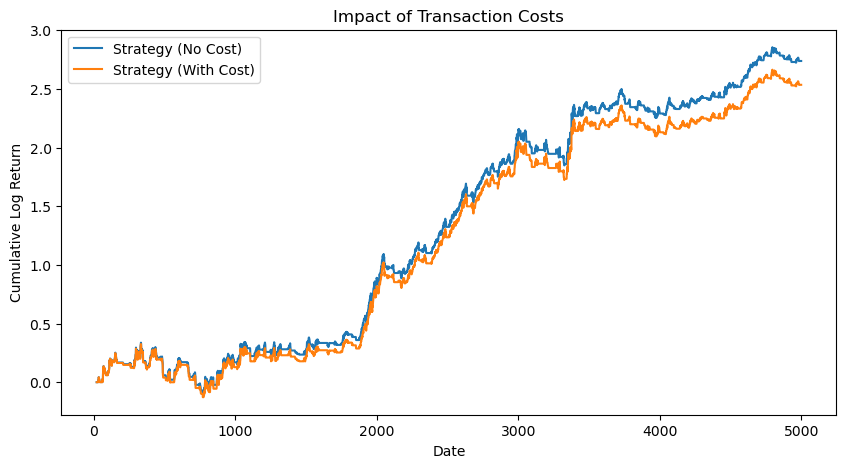

In [49]:
plt.figure(figsize=(10,5))

plt.plot(strategy_cum, label="Strategy (No Cost)")
plt.plot(strategy_cum_tc, label="Strategy (With Cost)")

plt.xlabel("Date")
plt.ylabel("Cumulative Log Return")
plt.title("Impact of Transaction Costs")
plt.legend()
plt.show()


In [50]:
sharpe_bh = returns.mean() / returns.std()
sharpe_strategy = strategy_returns_tc.mean()/strategy_returns_tc.std()

In [69]:
print(f'sharpe value for Buy_hold strategy: {sharpe_bh}')
print(f'sharpe value for Momentum strategy: {sharpe_strategy}')

sharpe value for Buy_hold strategy: 0.02611322988559608
sharpe value for Momentum strategy: 0.04867584721983871


Despite lower total returns in some periods, the strategy achieves a more favorable
risk-adjusted performance due to reduced volatility and drawdowns.


## 6. Key Takeaways

- Returns are noisy and difficult to predict.
- Volatility is time-varying and clustered.
- Simple rules can reduce drawdowns even if returns are not maximized.
- Risk control and survivability dominate long-term performance.
